___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___
# Logistic Regression Project 

In this project we will be working with a fake advertising data set, indicating whether or not a particular internet user clicked on an Advertisement. We will try to create a model that will predict whether or not they will click on an ad based off the features of that user.

This data set contains the following features:

* 'Daily Time Spent on Site': consumer time on site in minutes
* 'Age': cutomer age in years
* 'Area Income': Avg. Income of geographical area of consumer
* 'Daily Internet Usage': Avg. minutes a day consumer is on the internet
* 'Ad Topic Line': Headline of the advertisement
* 'City': City of consumer
* 'Male': Whether or not consumer was male
* 'Country': Country of consumer
* 'Timestamp': Time at which consumer clicked on Ad or closed window
* 'Clicked on Ad': 0 or 1 indicated clicking on Ad

## Import Libraries

**Import a few libraries you think you'll need (Or just import them as you go along!)**

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["patch.force_edgecolor"] = True # shows bin lines in all histograms
%matplotlib inline

## Get the Data
**Read in the advertising.csv file and set it to a data frame called ad_data.**

In [75]:
data = pd.read_csv('advertising.csv')

**Check the head of ad_data**

In [49]:
data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


** Use info and describe() on ad_data**

In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
Daily Time Spent on Site    1000 non-null float64
Age                         1000 non-null int64
Area Income                 1000 non-null float64
Daily Internet Usage        1000 non-null float64
Ad Topic Line               1000 non-null object
City                        1000 non-null object
Male                        1000 non-null int64
Country                     1000 non-null object
Timestamp                   1000 non-null object
Clicked on Ad               1000 non-null int64
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [51]:
data.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


In [52]:
data.isnull().head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False


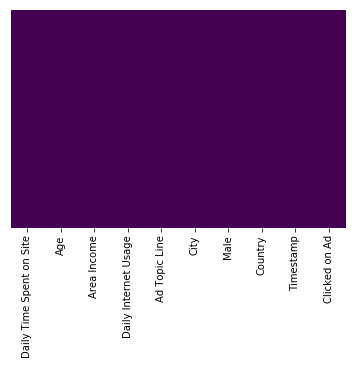

In [53]:
# Yellow marks indicate null (True in isnull()) values
sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap='viridis')

__The heatmap above shows there is no null data in the dataset. Null data is indicated with yellow ticks.__

## Exploratory Data Analysis

Let's use seaborn to explore the data!

Try recreating the plots shown below!

** Create a histogram of the Age**

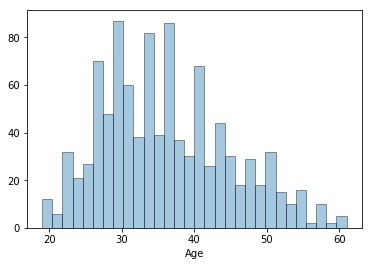

In [54]:
sns.distplot(data['Age'], kde=False, bins=30)

__From the histogram, we can conclude that the most common ages range from about 25 to 42 (estimates).__

**Create a jointplot showing Area Income versus Age.**

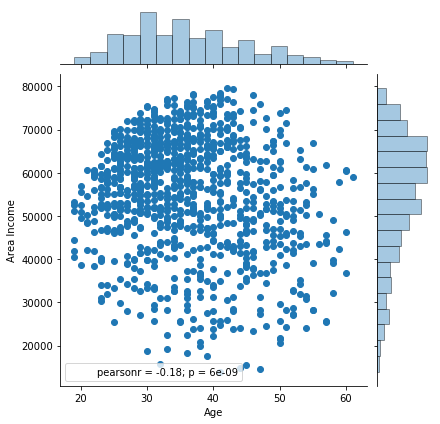

In [55]:
sns.jointplot(data['Age'], data['Area Income'])

**Create a jointplot showing the kde distributions of Daily Time spent on site vs. Age.**

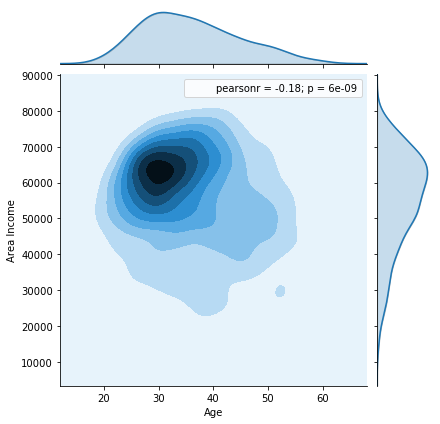

In [56]:
sns.jointplot(data['Age'], data['Area Income'], kind='kde')

__The joint scatterplot and joint heatmap show most people in the dataset are about 30 years old and have an income at around $60,000.__

** Create a jointplot of 'Daily Time Spent on Site' vs. 'Daily Internet Usage'**

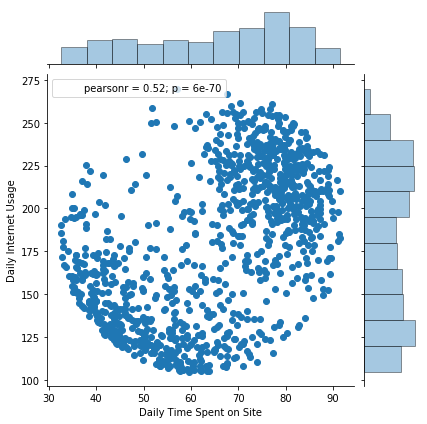

In [57]:
sns.jointplot(data['Daily Time Spent on Site'], data['Daily Internet Usage'])

__ The upper right corner of the plot shows people who both spend a lot of time on the internet, and spend that time in the internet using the site with the advertisement. The lower left corner of the plot show people who don't spend a lot of time on the internet, but spend most of their internet time on the site with the advertisement. __

** Finally, create a pairplot with the hue defined by the 'Clicked on Ad' column feature.**

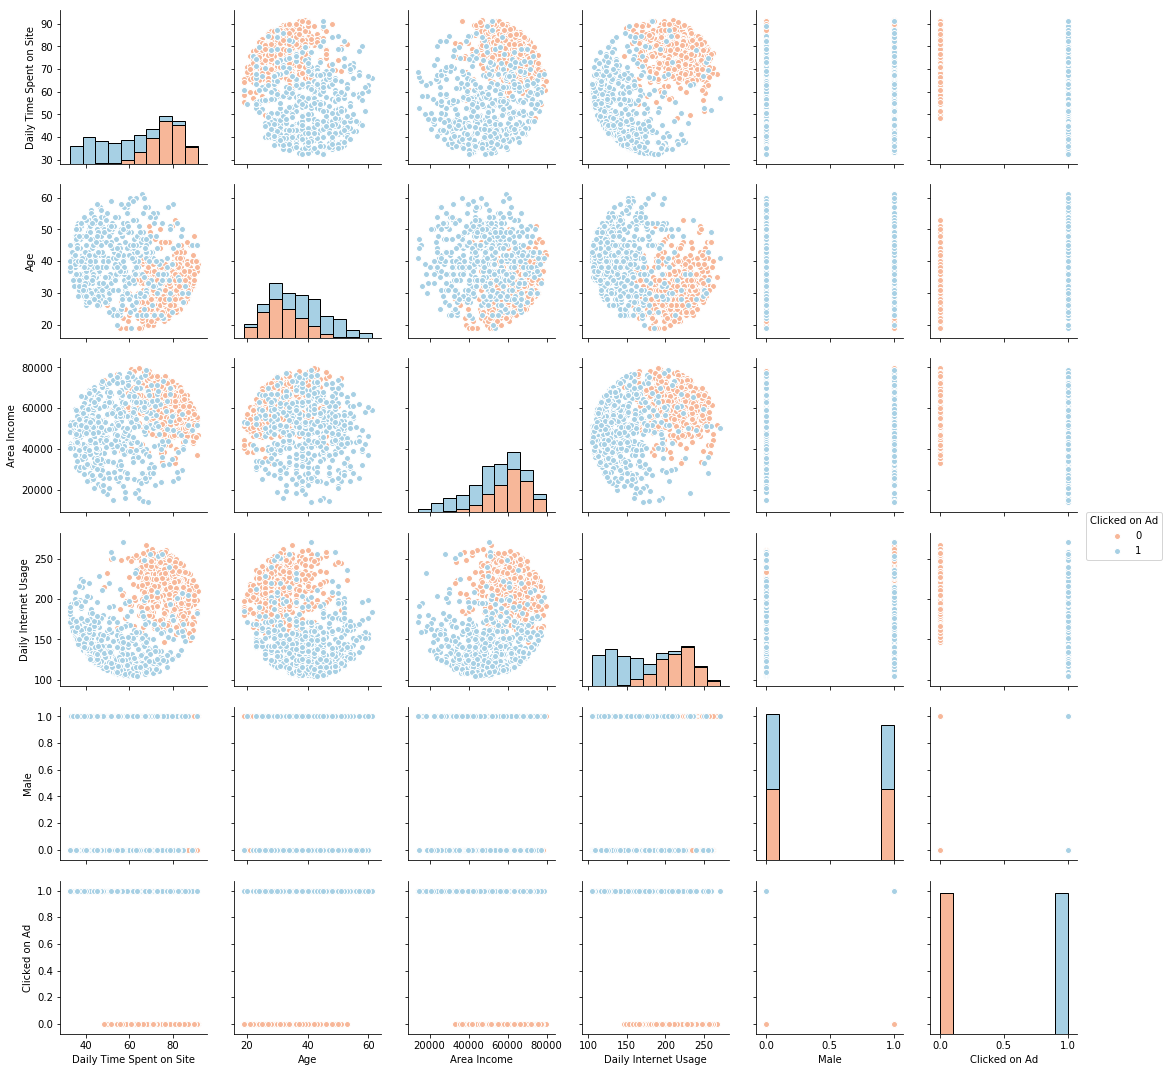

In [93]:
sns.pairplot(data, hue='Clicked on Ad', palette='RdBu')

__ The circular-shaped data in these plots have pretty good separation between people who clicked on an ad and people who did not. This may lead to a more accurate classification model. __

# Logistic Regression

Now it's time to do a train test split, and train our model!

You'll have the freedom here to choose columns that you want to train on!

** Split the data into training set and testing set using train_test_split**

In [76]:
data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [77]:
data.drop(['Ad Topic Line', 'City', 'Country', 'Timestamp'], axis=1, inplace=True)

In [78]:
data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
0,68.95,35,61833.90,256.09,0,0
1,80.23,31,68441.85,193.77,1,0
2,69.47,26,59785.94,236.50,0,0
3,74.15,29,54806.18,245.89,1,0
4,68.37,35,73889.99,225.58,0,0


In [79]:
from sklearn.cross_validation import train_test_split

In [80]:
X = data.drop('Clicked on Ad', axis=1)
y = data['Clicked on Ad']

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

** Train and fit a logistic regression model on the training set.**

In [65]:
from sklearn.linear_model import LogisticRegression

In [66]:
logmodel = LogisticRegression()

In [82]:
logmodel.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

## Predictions and Evaluations
** Now predict values for the testing data.**

In [83]:
predictions = logmodel.predict(X_test)

** Create a classification report for the model.**

In [84]:
from sklearn.metrics import classification_report

In [85]:
print(classification_report(y_test, predictions))

             precision    recall  f1-score   support

          0       0.91      0.95      0.93       157
          1       0.94      0.90      0.92       143

avg / total       0.92      0.92      0.92       300



In [87]:
from sklearn.metrics import confusion_matrix

In [88]:
confusion_matrix(y_test, predictions)

array([[149,   8],
       [ 15, 128]])

## Great Job!